In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random as r

Generate random test data

In [83]:
def getTestData(n, f):
    testData = []
    for _ in range(n):
        x, y = r.randint(-1000,1000), r.randint(-1000,1000)
        testData.append([x, y, 1 if (f[0] * x + f[1] * y + f[2] >= 0) else -1])
    return np.array(testData)

n = 100
f = [r.randint(-100, 100) for _ in range(3)] # f(x,y) = ax + by + c
a,b,c = f
# data = [x y class]
df = pd.DataFrame(getTestData(n, f))

Plot data

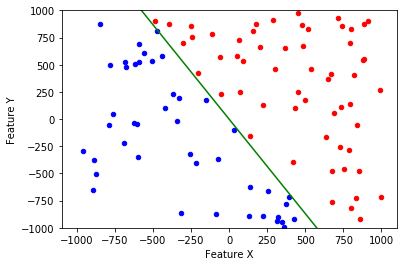

In [84]:
ax = plt.gca()
df[df[2].isin([1])].plot(kind='scatter',x=0, y=1,c='r', ax=ax)
df[df[2].isin([-1])].plot(kind='scatter', x=0, y=1,c='b', ax=ax)
x = np.linspace(-1000,1000,1000)
plt.plot(x, (-a*x-c)/b, c='g', label = 'f')
plt.ylim(-1000,1000)
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.show()

Perceptron learning algorithm

In [87]:
w0, w1, w2 = r.randint(-100, 100), r.randint(-100, 100), r.randint(-100, 100)

flag = False
count = 0
while flag != True :
    count += 1
    flag = True
#     print("Intermediate weights: ", w0, w1, w2)
    for _,x,y,l in df.itertuples():
        temp = w1 * x + w2 * y + w0
        if l == 1 and temp < 0:
            flag = False
            w1 = w1 + x
            w2 = w2 + y
            w0 = w0 + 1
            break
        if (l == -1 and temp >= 0):
            flag = False
            w1 = w1 - x
            w2 = w2 - y
            w0 = w0 - 1
            break
print()
print("No of updates:", count)
print("Weights:", w0, w1, w2)


No of updates: 44
Weights: 55 4102 2273


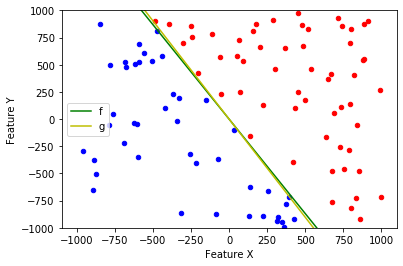

In [90]:
ax = plt.gca()
df[df[2].isin([1])].plot(kind='scatter',x=0, y=1,c='r', ax=ax)
df[df[2].isin([-1])].plot(kind='scatter', x=0, y=1,c='b', ax=ax)
x = np.linspace(-1000,1000,1000)
plt.plot(x, (-a*x-c)/b, c='g', label = 'f')
plt.plot(x, (-w1*x-w0)/w2, c='y', label = 'g')
plt.ylim(-1000,1000)
plt.legend()
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.show()